## Basic Statistics Case Study

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")

## BUSINESS PROBLEM-1

### BUSINESS PROBLEM:
-Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
-a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan 
amounts)
-b. Loan length is directly effecting intrest rate.
-c. Inrest rate varies for different purpose of loans
-d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [2]:
loans_data=pd.read_csv(r"D:\Data Analyssis\Python\Case studies\4. Basic Statistics - Hypothesis Testing\LoansData.csv")

In [3]:
loans_data

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [5]:
# replacing all the periods (‘.’) in the column names with underscores (‘_’)
loans_data.columns=loans_data.columns.str.replace('.','_')

In [6]:
loans_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [7]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [8]:
loans_data.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [10]:
loans_data.Interest_Rate=loans_data.Interest_Rate.str.replace('%','')

In [11]:
loans_data.Interest_Rate=loans_data.Interest_Rate.astype('float64')

In [12]:
loans_data["Interest_Rate"]

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 2500, dtype: float64

In [13]:
loans_data.dropna(subset=['Interest_Rate','Amount_Funded_By_Investors'],inplace=True)

In [14]:
loans_data.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

## a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [15]:
stats.pearsonr( loans_data.Amount_Funded_By_Investors,loans_data.Interest_Rate)

PearsonRResult(statistic=0.3374540043675968, pvalue=1.4916862719493553e-67)

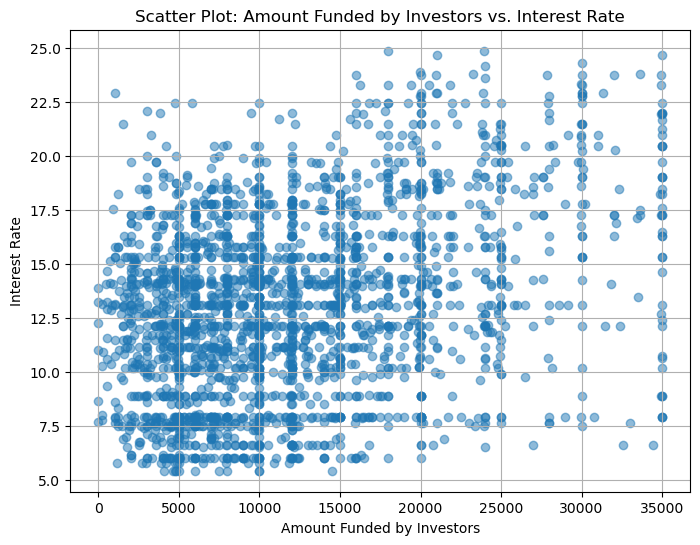

In [16]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(loans_data['Amount_Funded_By_Investors'], loans_data['Interest_Rate'], alpha=0.5)
plt.title('Scatter Plot: Amount Funded by Investors vs. Interest Rate')
plt.xlabel('Amount Funded by Investors')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

## b.Loan length is directly affecting interest rate

In [17]:
# Convert loan_length to numeric (months)
loans_data['Loan_Length'] = loans_data['Loan_Length'].str.extract('(\d+)').astype(float)

In [18]:
loans_data['Loan_Length']

0       36.0
1       36.0
2       60.0
3       36.0
4       36.0
        ... 
2495    60.0
2496    60.0
2497    36.0
2498    36.0
2499    36.0
Name: Loan_Length, Length: 2497, dtype: float64

In [19]:
stats.pearsonr( loans_data.Loan_Length,loans_data.Interest_Rate)

PearsonRResult(statistic=0.4241835190219524, pvalue=1.2675109256991992e-109)

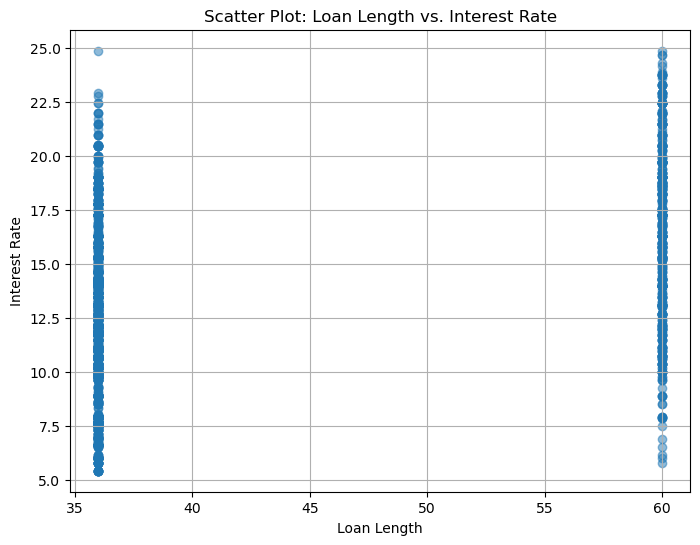

In [21]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(loans_data['Loan_Length'], loans_data['Interest_Rate'], alpha=0.5)
plt.title('Scatter Plot: Loan Length vs. Interest Rate')
plt.xlabel('Loan Length')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

## C. Interest rate varies for different purpose of loans

In [22]:
from scipy.stats import f_oneway

# Perform ANOVA to test if interest rates vary with different loan purposes
loan_purposes = loans_data['Loan_Purpose'].unique()
groups = [loans_data[loans_data['Loan_Purpose'] == purpose]['Interest_Rate'] for purpose in loan_purposes]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print("ANOVA Test Results for Interest Rate and Loan Purposes:")
print("F-statistic:", f_stat)
print("P-value:", p_value)

ANOVA Test Results for Interest Rate and Loan Purposes:
F-statistic: 7.486710128328652
P-value: 1.1349601779818787e-14


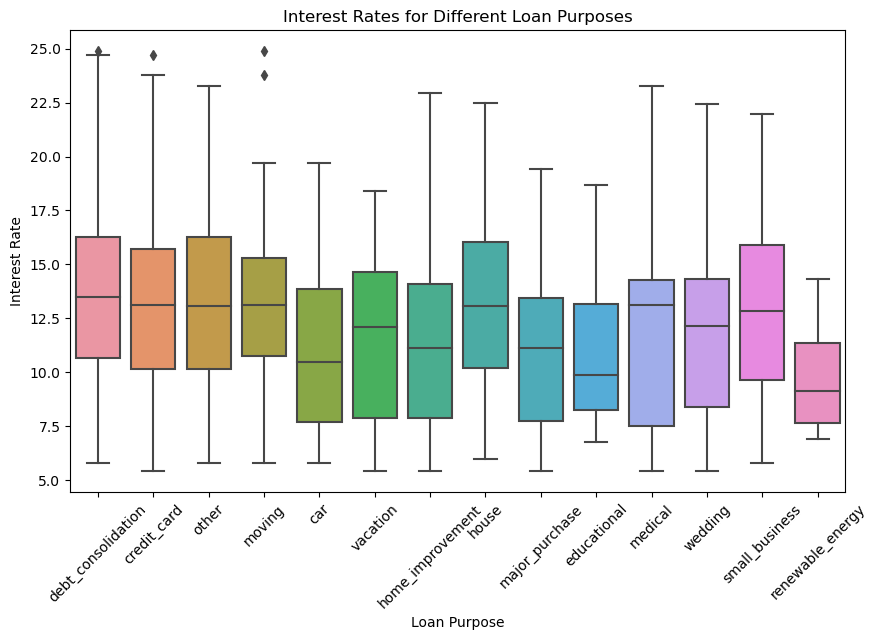

In [23]:
# a boxplot to show the distribution of interest rates for each loan purpose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Purpose', y='Interest_Rate', data=loans_data)
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.title('Interest Rates for Different Loan Purposes')
plt.xticks(rotation=45)  
plt.show()

## d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [24]:
df=loans_data.loc[loans_data.Home_Ownership=='OWN',['Home_Ownership','FICO_Range']]
df1=df.groupby(['FICO_Range'])['Home_Ownership'].count().reset_index()
df1

,FICO_Range,Home_Ownership
0,640-644,1
1,660-664,17
2,665-669,18
3,670-674,13
4,675-679,11
5,680-684,9
6,685-689,10
7,690-694,10
8,695-699,10
9,700-704,12


In [25]:
df1.loc[0:11,['FICO_Range']]=[1]
df1.loc[11:22,['FICO_Range']]=[2]
df1.loc[22:33,['FICO_Range']]=[3]
df1

,FICO_Range,Home_Ownership
0,1,1
1,1,17
2,1,18
3,1,13
4,1,11
5,1,9
6,1,10
7,1,10
8,1,10
9,1,12


In [28]:
stats.f_oneway(df1.FICO_Range,df1.Home_Ownership)

F_onewayResult(statistic=22.32639104755983, pvalue=1.3025101385332697e-05)

## BUSINESS PROBLEM - 2

### BUSINESS PROBLEM: We would like to assess if there is any difference in the average  price quotes provided by Mary and Barry.

In [29]:
price_quotes = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [30]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [31]:
price_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [32]:
# Calculating mean quotes for Mary and Barry
mean_mary = price_quotes['Mary_Price'].mean()
mean_barry = price_quotes['Barry_Price'].mean()

print("Average price quote by Mary:", mean_mary)
print("Average price quote by Barry:", mean_barry)

Average price quote by Mary: 114.75
Average price quote by Barry: 124.33333333333333


In [33]:
stats.ttest_rel(price_quotes.Barry_Price,price_quotes.Mary_Price)

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

## BUSINESS PROBLEM-3

### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the  incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved

In [34]:
treatment_facility = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

In [35]:
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [36]:
treatment_facility.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [37]:
treatment_facility.head(2)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [38]:
treatment_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF               20 non-null     float64
 4   CI                 20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [39]:
prior = treatment_facility.loc[treatment_facility['Reengineer'] == 'Prior', 'CI']
post = treatment_facility.loc[treatment_facility['Reengineer'] == 'Post', 'CI']

# means for 'CI' before and after reengineering
print('Average of CI before reengineering effort:', prior.mean())
print('Average of CI after reengineering effort:', post.mean())

Average of CI before reengineering effort: 53.887906321846145
Average of CI after reengineering effort: 23.34971927988571


In [40]:
# t-test to compare 'CI' means before and after reengineering
t_stat, p_value = stats.ttest_ind(prior, post)

# Print test results
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 1.627914425352865
P-value: 0.12091989189884148


## BUSINESS PROBLEM-4

### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [41]:
priority = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")

In [42]:
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [43]:
priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [44]:
high = priority.loc[priority.Priority == 'High', 'Days']
medium = priority.loc[priority.Priority == 'Medium', 'Days']
low = priority.loc[priority.Priority == 'Low', 'Days']

print('The average days to complete High priority jobs:', high.mean())
print('The average days to complete Medium priority jobs:', medium.mean())
print('The average days to complete Low priority jobs:', low.mean())

The average days to complete High priority jobs: 3.0236196319018402
The average days to complete Medium priority jobs: 2.5
The average days to complete Low priority jobs: 4.228358208955224


In [45]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(high, medium, low)

# Print ANOVA test results
print("\nANOVA test results:")
print("F-statistic:", f_stat)
print("P-value:", p_value)


ANOVA test results:
F-statistic: 1.812311010076072
P-value: 0.16411459461716182


## BUSINESS PROBLEM-5

### BUSINESS PROBLEM: Use the survey results to addressthe following questions
- What isthe overall level of customer satisfaction?
- What factors are linked to satisfaction?
- What is the demographic profile of Film on the Rocks patrons?
- In what media outlet(s) should the film series be advertised?

In [46]:
films = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\4. Basic Statistics - Hypothesis Testing\Films.csv")

In [47]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [48]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [49]:
films.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      _rowstate_  Movie  Gender  Marital_Status  Sinage  Parking  Clean  \
0         False  False   False           False   False    False  False   
1         False  False   False           False   False    False  False   
2         False  False   False           False   False    False  False   
3         False  False   False           False   False    False  False   
4         False  False   False           False   False    False  False   
..          ...    ...     ...             ...     ...      ...    ...   
325       False  False   False           False   False    False  False   
326       False  False   False           False   False    False  False   
327       False  False   False           False   False    False  False   
328       False  False   False           False   False    False  False   
329       False  False   False           False   False    False  False   

     Overall    Age  Income  Hear_About  
0      

## Q.1. What is the overall level of customer satisfaction?

In [50]:
#'Overall' is the column with satisfaction levels
average_rating = films['Overall'].mean()
print(f'The average satisfaction rating is: {average_rating}')

The average satisfaction rating is: 1.6189024390243902


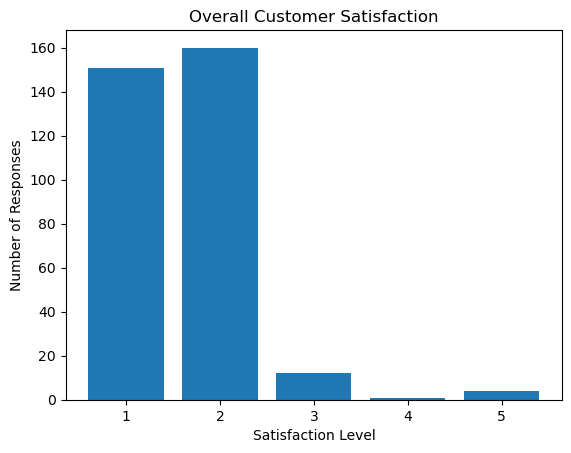

In [51]:
# 'Overall' is the column with satisfaction levels
plt.hist(films['Overall'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8)
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Responses')
plt.title('Overall Customer Satisfaction')
plt.show()

## 2. What factors are linked to satisfaction?

In [52]:
# correlation 
correlations = films.corr()['Overall'].sort_values()
print(correlations)

Age          -0.034171
Income       -0.004050
Clean         0.349412
Sinage        0.382881
Parking       0.516585
Overall       1.000000
_rowstate_         NaN
Name: Overall, dtype: float64


### Conclusion 
output shown is the correlation between ‘Overall’ satisfaction and each of the other numeric columns in the DataFrame, and it signifies:
Clean: The correlation coefficient is 0.349412, which suggests a moderate positive relationship between the cleanliness of the venue and overall satisfaction.
Sinage: The correlation coefficient is 0.382881, which suggests a moderate positive relationship between the signage directing to Red Rocks and overall satisfaction.
Parking: The correlation coefficient is 0.516585, which suggests a strong positive relationship between the venue’s parking and overall satisfaction.

### Therefore Sinage,Parking and Clean are the factors linked to satisfaction

## performing a Chi-Square test of independence. This test is used to determine if there is a significant association between two categorical variables

In [53]:
# testing if there’s a relationship between ‘Sinage’ and ‘Overall’
sin=pd.crosstab(films.Sinage,films.Overall)
stats.chi2_contingency(observed=sin)

Chi2ContingencyResult(statistic=124.81695331531306, pvalue=6.47639805161236e-19, dof=16, expected_freq=array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
        1.38226300e+00],
       [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
        1.89602446e+00],
       [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
        5.87155963e-01],
       [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
        7.33944954e-02],
       [2.29357798e+00, 2.44648318e+00, 1.83486239e-01, 1.52905199e-02,
        6.11620795e-02]]))

In [54]:
# testing if there’s a relationship between ‘Parking’ and ‘Overall’
park_over=pd.crosstab(films.Parking,films.Overall)
stats.chi2_contingency(observed=park_over)

Chi2ContingencyResult(statistic=229.4794365763204, pvalue=8.162450437898108e-40, dof=16, expected_freq=array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
        1.63914373e+00],
       [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
        1.87155963e+00],
       [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
        3.54740061e-01],
       [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
        8.56269113e-02],
       [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
        4.89296636e-02]]))

In [55]:
# testing if there’s a relationship between ‘Clean’ and ‘Overall’

clean_over=pd.crosstab(films.Clean,films.Overall)
stats.chi2_contingency(observed=clean_over)

Chi2ContingencyResult(statistic=125.17708834561675, pvalue=5.517448379868074e-19, dof=16, expected_freq=array([[6.64954128e+01, 7.00183486e+01, 5.28440367e+00, 4.40366972e-01,
        1.76146789e+00],
       [7.01896024e+01, 7.39082569e+01, 5.57798165e+00, 4.64831804e-01,
        1.85932722e+00],
       [1.10825688e+01, 1.16697248e+01, 8.80733945e-01, 7.33944954e-02,
        2.93577982e-01],
       [2.30886850e+00, 2.43119266e+00, 1.83486239e-01, 1.52905199e-02,
        6.11620795e-02],
       [9.23547401e-01, 9.72477064e-01, 7.33944954e-02, 6.11620795e-03,
        2.44648318e-02]]))

## Q. 3.What is the demographic profile of Film on the Rocks patrons?

In [56]:
films.loc[films.Gender=='1',['Gender']]=['Male']
films.loc[films.Gender=='2',['Gender']]=['Female']

In [57]:
films.loc[films.Marital_Status=='Slngle',['Marital_Status']]=['Single']
films.loc[films.Marital_Status=='1',['Marital_Status']]=['Married']
films.loc[films.Marital_Status=='2',['Marital_Status']]=['Single']

In [58]:
films.loc[films.Age==1,['Age']]=['1-12']
films.loc[films.Age==2,['Age']]=['13-30']
films.loc[films.Age==3,['Age']]=['31-60']
films.loc[films.Age==4,['Age']]=['60+']

In [59]:
films.loc[films.Income==1,['Income']]=['<$50,000']
films.loc[films.Income==2,['Income']]=['$50-$100,000']
films.loc[films.Income==3,['Income']]=['=$100,000+']

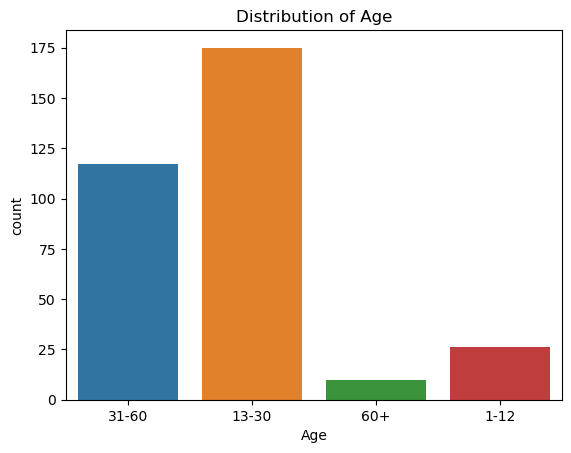

In [60]:
# Countplot for age distribution
sns.countplot(x='Age',data=films)
plt.title('Distribution of Age');

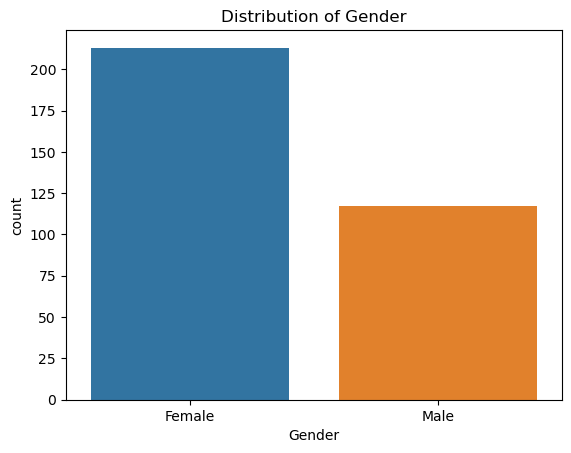

In [61]:
# distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=films);
plt.title('Distribution of Gender');

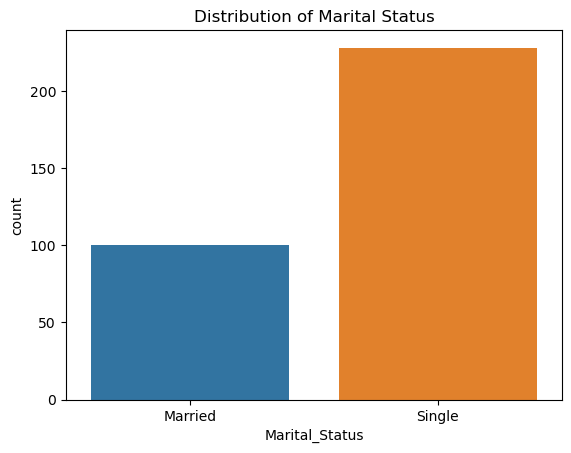

In [62]:
# Distribution of marital status 
sns.countplot(x='Marital_Status', data=films);
plt.title('Distribution of Marital Status');

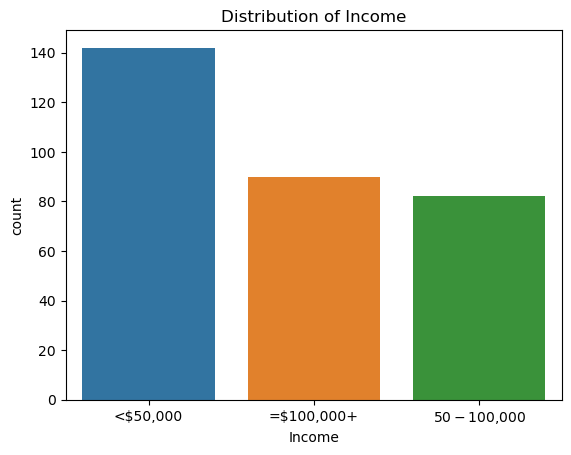

In [63]:
# Distribution of Income 
sns.countplot(x='Income', data=films);
plt.title('Distribution of Income');

### Most of those answering questions have income less than $50,000

## Q.4 In what media outlet(s) should the film series be advertised?

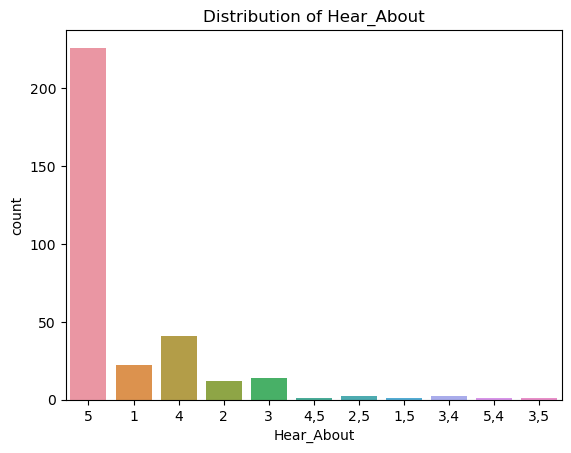

In [64]:
# Distribution of Hear_About:
sns.countplot(x='Hear_About', data=films);
plt.title('Distribution of Hear_About');